<IPython.core.display.Javascript object>


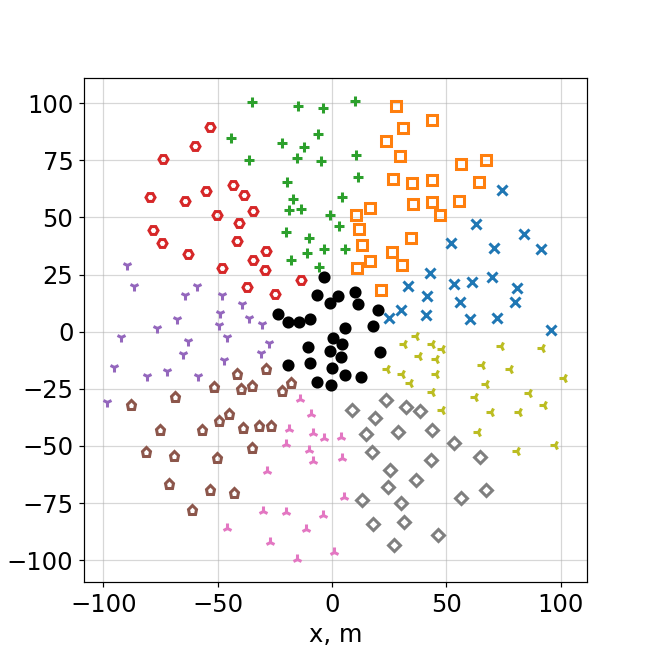

FPGA, Number of core antennas
0 26
1 21
2 25
3 27
4 22
5 24
6 24
7 20
8 23
9 26
10 0

Core Total: 238
Total: 352

Antenna ids by FPGA number
0 [ 76  79  81 108 109 110 111 112 113 114 115 116 117 118 119 120 143 145
 146 147 148 149 150 172 174 178]
1 [ 3  4  5  6  7  9 10 11 12 13 14 15 42 43 44 45 46 47 74 77 78]
2 [  1   2  33  34  35  36  37  38  39  40  41  65  66  67  68  69  70  71
  72  73  75 101 104 105 107]
3 [ 97  98  99 100 102 103 106 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 161 162 163 164 166 194]
4 [144 165 167 168 169 170 171 193 195 196 197 198 200 201 202 203 204 225
 226 227 228 229]
5 [173 175 176 177 205 206 207 208 209 210 211 213 231 232 233 235 236 237
 238 239 240 241 242 245]
6 [151 179 180 181 182 183 186 212 214 215 216 217 218 219 220 221 222 223
 244 246 248 249 250 251]
7 [123 124 125 128 152 153 154 155 156 157 158 159 160 184 185 187 189 190
 192 224]
8 [ 31  32  56  57  58  59  61  62  64  85  86  87  88  89  90  91  92  93
  94  95 1

/Users/romerowo/anaconda/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [1]:
%matplotlib notebook
from pylab import *

'''
Read in the antenna positions.
'''
x_ant = []
y_ant = []
z_ant = []
id_ant = []
id_count = []
cc=0

for line in file('LWA-OVRO-352_2020MAY05_new_numbering.txt'):
    if 'LWA' in line[0:3]:
        if 'LWA-234' in line: continue
        x_ant.append(float(line.split()[1]))
        y_ant.append(float(line.split()[2]))
        z_ant.append(float(line.split()[3]))
        id_ant.append(int(line.split()[0].split('-')[-1]))
        id_count.append(cc)
        cc+=1
'''
#for line in file('LWA-352-march30.txt'):
for line in file('OVRO-LWA-352-2020APR13-optall-32.txt'):
    if '#' not in line[0]:
        #print line.split()
        x_ant.append(float(line.split()[0]))
        y_ant.append(float(line.split()[1]))
        #z_ant.append(float(line.split()[2]))
        #id_ant.append(int(line.split('-')[-1]))
        id_ant.append(cc)
        cc+=1
'''

x_ant = np.array(x_ant) 
y_ant = np.array(y_ant) 
id_ant = np.array(id_ant) 

'''
NOTE: Kathryn's additional antenna is located at (x,y) = (+50 m,-175 m). 
I moved antenna 63, which was really close to antenna 62
'''
#x_ant[63] = 50.
#y_ant[63] = -175.

n_sectors = 11
'''
Initiallize FPGA assignments as a boolean array (the antenna is in the FPGA or it isn't)
'''
fpga2ant    = np.zeros((n_sectors, len(id_ant)), dtype = bool)

'''
Define an inner core with 25 m radius
'''
inner_core_radius = 25. # meters
core_radius = 130. # this just bounds the core antennas from outliers. 

'''
First FPGA is for the inner core
'''
fpga2ant[0] = x_ant**2 + y_ant**2 < inner_core_radius**2

'''
The other FPGAs are azimuthal sectors
'''
phi_ant = np.arctan2(y_ant, x_ant)
phi_ant = np.mod(phi_ant, 2.*pi) # so it spans 0 - 2*pi instead of -pi to +pi
for i in range(1,10):
    ph0 = (float(i)-1.)*2.*pi/9.
    ph1 = (float(i))*2.*pi/9.
    fpga2ant[i] = np.logical_and(phi_ant>=ph0, phi_ant<ph1)
    fpga2ant[i] = np.logical_and(fpga2ant[i], x_ant**2 + y_ant**2 >= inner_core_radius**2)
    fpga2ant[i] = np.logical_and(fpga2ant[i], x_ant**2 + y_ant**2 <= core_radius**2)

'''
Plot
'''
cvls = np.linspace(0,1,n_sectors)
idxs = range(len(cvls))
np.random.shuffle(idxs)
mrks = ['o', 'x', 's', '+', 'H', '1', 'p', '2', 'D', '3', '^']

rcParams['font.size']=16
sum_core = 0
figure(figsize=(6, 6))
print 'FPGA, Number of core antennas'
print '============================='
for i in range(len(fpga2ant)):
    k = i%len(mrks)
    print i, np.sum(fpga2ant[i])
    sum_core += np.sum(fpga2ant[i])
    if i==0:
        plot(x_ant[fpga2ant[i]], y_ant[fpga2ant[i]], marker=mrks[k], linewidth=0, mew=2, color='k')#, mc=colors[0])
    if i>0:
        plot(x_ant[fpga2ant[i]], y_ant[fpga2ant[i]], marker=mrks[k], linewidth=0, mfc='none', mew=2)#, mc=colors[0])
axes().set_aspect('equal')
xlabel('x, m')
ylabel('y, m')
grid(True, alpha=0.5)
print ''
print 'Core Total:', sum_core
print 'Total:', len(x_ant)

print ''
print 'Antenna ids by FPGA number'
print '=========================='
for i in range(len(fpga2ant)):
    k = i%len(mrks)
    print i, id_ant[fpga2ant[i]]

<IPython.core.display.Javascript object>


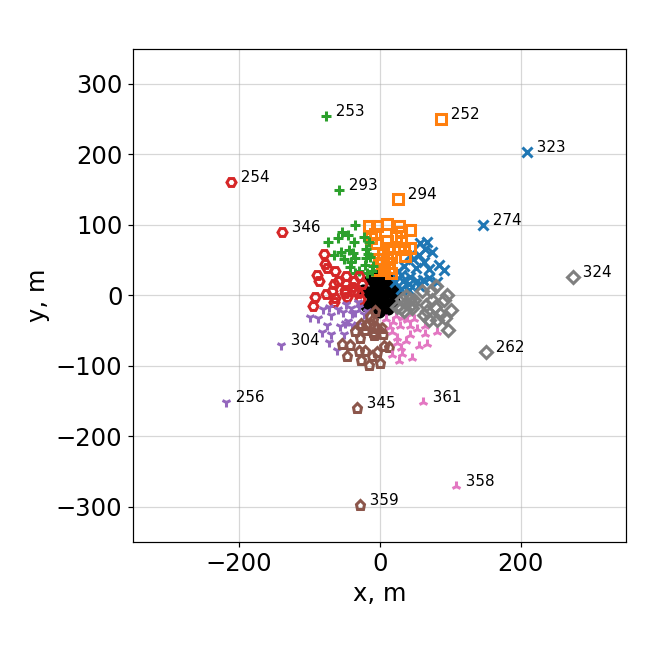

FPGA, Number of core antennas
0 29
1 28
2 29
3 28
4 28
5 28
6 28
7 28
8 28
9 0
10 0

Core Total: 254

Antenna ids by FPGA number
0 [ 76  78  79  81 107 108 109 110 111 112 113 114 115 116 117 118 119 120
 142 143 144 145 146 147 148 149 172 174 178]
1 [  1   2   3   4   5   6   7   9  10  11  34  37  38  40  41  42  43  44
  45  46  47  71  73  74  75  77 274 323]
2 [ 33  35  36  39  65  66  67  68  69  70  72  97  98  99 100 101 102 103
 104 105 106 129 130 131 132 134 139 252 294]
3 [133 135 136 137 138 140 141 161 162 163 164 165 166 167 168 193 194 195
 196 197 198 200 201 202 225 227 253 293]
4 [169 170 171 173 175 176 203 204 205 206 207 208 209 210 226 228 229 231
 232 233 235 236 237 238 239 240 254 346]
5 [151 177 179 180 181 183 211 212 213 214 215 216 217 218 219 220 223 241
 242 244 245 246 248 249 250 251 256 304]
6 [123 124 125 126 128 150 152 153 154 155 156 157 158 159 160 182 184 185
 186 187 189 190 192 221 222 224 345 359]
7 [ 28  30  31  32  54  55  56  57  58  59  

In [2]:
n_sectors = 11
'''
Initialize FPGA assignments as a boolean array (the antenna is in the FPGA or it isn't)
'''
fpga2ant    = np.zeros((n_sectors, len(id_ant)), dtype = bool)

'''
Initialize a veto list
'''
fpga_veto_list = np.zeros((n_sectors, len(id_ant)), dtype = bool)

'''
Define an inner core with 25 m radius
'''
inner_core_radius = 27. # meters
core_radius = 130. # this just bounds the core antennas from outliers. 

'''
First FPGA is for the inner core
'''
fpga2ant[0] = x_ant**2 + y_ant**2 < inner_core_radius**2

'''
The other FPGAs are azimuthal sectors
'''
phi_ant = np.arctan2(y_ant, x_ant)
phi_ant -= 10.* pi/180.
phi_ant = np.mod(phi_ant, 2.*pi) # so it spans 0 - 2*pi instead of -pi to +pi
for i in range(1,9):
    ph0 = (float(i)-1.)*2.*pi/8.
    ph1 = (float(i))*2.*pi/8.
    fpga2ant[i] = np.logical_and(phi_ant>=ph0, phi_ant<ph1)
    fpga2ant[i] = np.logical_and(fpga2ant[i], x_ant**2 + y_ant**2 >= inner_core_radius**2)
    fpga2ant[i] = np.logical_and(fpga2ant[i], x_ant**2 + y_ant**2 <= core_radius**2)

'''
Tweak
'''
fpga2ant[0,143], fpga2ant[6,143] = False, True
fpga2ant[5,211], fpga2ant[6,211] = False, True
fpga2ant[7,120], fpga2ant[6,120] = False, True

fpga2ant[8,25], fpga2ant[7,25] = False, True
fpga2ant[8,27], fpga2ant[7,27] = False, True
fpga2ant[8,51], fpga2ant[7,51] = False, True

fpga2ant[3,216], fpga2ant[4,216] = False, True

fpga2ant[3,162], fpga2ant[4,162] = False, True

fpga2ant[3,135], fpga2ant[0,135] = False, True

fpga2ant[2,101], fpga2ant[0,101] = False, True


'''
Add nearest outliers
'''
fpga2ant[1, 260] = True
fpga2ant[2, 332] = True
fpga2ant[3, 331] = True
fpga2ant[4, 338] = True
fpga2ant[5, 334] = True
fpga2ant[6, 337] = True
fpga2ant[7, 347] = True
fpga2ant[8, 248] = True

'''
Add next nearest outliers
'''
#'''
# this version is for potential trigger participants.
fpga2ant[1, 303] = True
fpga2ant[2, 238] = True
fpga2ant[3, 239] = True
fpga2ant[4, 240] = True
fpga2ant[5, 242] = True
fpga2ant[6, 345] = True
fpga2ant[7, 344] = True
fpga2ant[8, 304] = True
#'''

# this version is for potential veto participants.
'''
fpga2ant[1, 242], fpga_veto_list[1, 242] = True, True
fpga2ant[2, 345], fpga_veto_list[2, 345] = True, True
fpga2ant[3, 344], fpga_veto_list[3, 344] = True, True
fpga2ant[4, 343], fpga_veto_list[4, 343] = True, True
fpga2ant[5, 303], fpga_veto_list[5, 303] = True, True
fpga2ant[6, 238], fpga_veto_list[6, 238] = True, True
fpga2ant[7, 240], fpga_veto_list[7, 240] = True, True
fpga2ant[8, 241], fpga_veto_list[8, 241] = True, True
'''


'''
Plot
'''
cvls = np.linspace(0,1,n_sectors)
idxs = range(len(cvls))
np.random.shuffle(idxs)

rcParams['font.size']=16
sum_core = 0
figure(figsize=(6, 6))
print 'FPGA, Number of core antennas'
print '============================='
for i in range(len(fpga2ant)):
    k = i%len(mrks)
    print i, np.sum(fpga2ant[i])
    sum_core += np.sum(fpga2ant[i])
    if i==0:
        plot(x_ant[fpga2ant[i]], y_ant[fpga2ant[i]], marker=mrks[k], linewidth=0, color='k', mew=2, ms=6)#, mc=colors[0])
        plot(x_ant[fpga_veto_list[i]], y_ant[fpga_veto_list[i]], marker=mrks[k], linewidth=0, color='k', mew=2, ms=16, mfc='none')#, mc=colors[0])
    if i>0:
        plot(x_ant[fpga2ant[i]], y_ant[fpga2ant[i]], marker=mrks[k], linewidth=0, mfc='none', mew=2, ms=6, color='C%d'%((i-1)%10))#, mc=colors[0])
        plot(x_ant[fpga_veto_list[i]], y_ant[fpga_veto_list[i]], marker='o', linewidth=0, mfc='none', mew=1, ms=12, color='C%d'%((i-1)%10))#, mc=colors[0])

ant_remain = np.logical_not(np.sum(fpga2ant[0:11,:], axis=0))

#plot(x_ant[ant_remain], y_ant[ant_remain], marker='x', linewidth=0, mfc='none', mew=1, ms=8, color='fuchsia', alpha=0.9)#, mc=colors[0])

for k in range(len(x_ant)):
    if(x_ant[k]**2+y_ant[k]**2>110.**2 and x_ant[k]**2+y_ant[k]**2<350.**2):
        if ant_remain[k] == False:
            text(x_ant[k], y_ant[k], '  %d'%id_ant[k], fontsize=10)
            #text(x_ant[k], y_ant[k], '  %d'%k, fontsize=10)
    
xlim(-350., 350.)
ylim(-350., 350.)
axes().set_aspect('equal')
xlabel('x, m')
ylabel('y, m')
grid(True, alpha=0.5)
tight_layout()
savefig('layout_zoom.pdf')
print ''
print 'Core Total:', sum_core

print ''
print 'Antenna ids by FPGA number'
print '=========================='
for i in range(len(fpga2ant)):
    k = i%len(mrks)
    print i, id_ant[fpga2ant[i]]


<IPython.core.display.Javascript object>


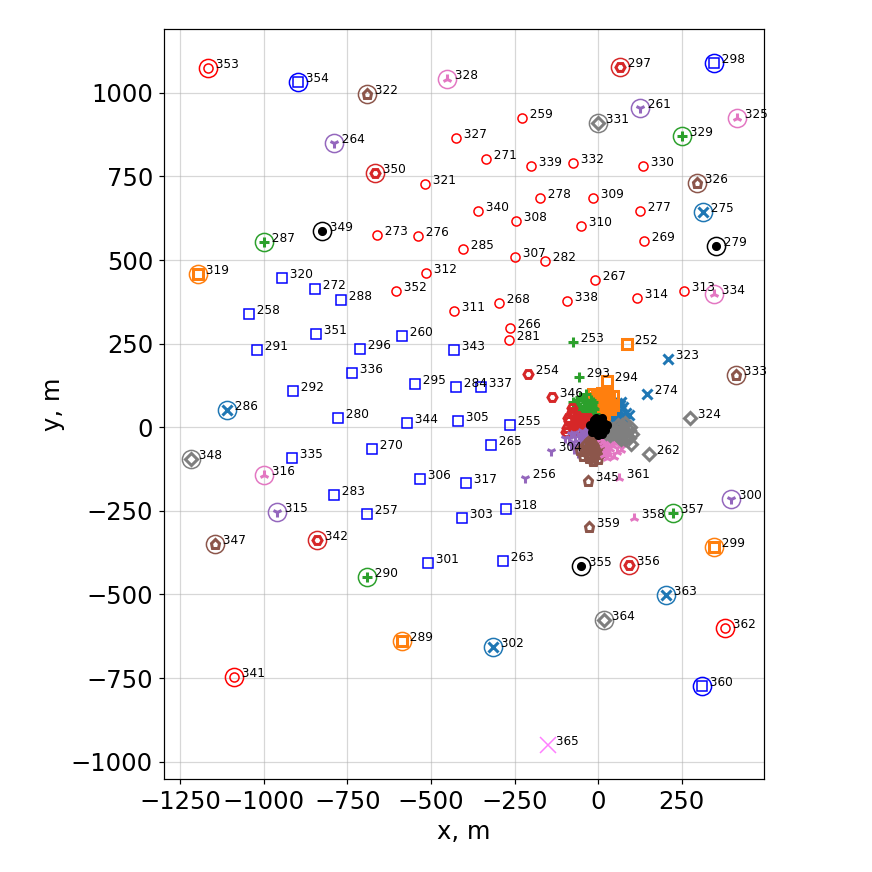

0 32
1 32
2 32
3 32
4 32
5 32
6 32
7 32
8 31
np.sum(fpga2ant[9]) 32
np.sum(fpga2ant[10]) 32

351, 365, -150	-950
[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False Fals

In [3]:
#fpga2ant[10] = np.ones(len(id_ant), dtype=bool)
x0 = -200.
y0 = 565.
Rx = 500.
Ry = 400.
theta = 0. * pi/180.
fpga2ant[9] = ((x_ant-x0)*np.cos(theta)+(y_ant-y0)*np.sin(theta))**2/Rx**2 + ((x_ant-x0)*np.sin(theta)-(y_ant-y0)*np.cos(theta))**2/Ry**2  < 1. 
# Tweak
fpga2ant[9, 238] = False
fpga2ant[9, 239] = False
fpga2ant[9, 240] = False
fpga2ant[9, 323] = False
fpga2ant[9, 245] = False
fpga2ant[9, 311] = False
fpga2ant[9, 307] = False
fpga2ant[9, 295] = False
fpga2ant[9, 303] = False

fpga2ant[9, 295] = True
fpga2ant[9, 307] = True
fpga2ant[9, 245] = True

fpga2ant[9, 321], fpga_veto_list[9, 321] = True, True
fpga2ant[9, 348], fpga_veto_list[9, 348] = True, True
fpga2ant[9, 339], fpga_veto_list[9, 339] = True, True

'''
fpga2ant[9, 297] = False
fpga2ant[9, 303] = False
fpga2ant[9, 304] = False
# Veto
fpga2ant[9, 302] = True
fpga2ant[9, 337] = True
fpga2ant[9, 349]  = True
'''

'''
Variant 1 (w/ southern coverage)
'''
'''
x0 = -325.
y0 = -350.
Rx = 300.
Ry = 750.
theta = 60. * pi/180.
fpga2ant[10] = ((x_ant-x0)*np.cos(theta)+(y_ant-y0)*np.sin(theta))**2/Rx**2 + ((x_ant-x0)*np.sin(theta)-(y_ant-y0)*np.cos(theta))**2/Ry**2  < 1. 
# Tweak
fpga2ant[10, 314] = False

fpga2ant[10, 242] = True
fpga2ant[10, 279] = True
fpga2ant[10, 271] = True
fpga2ant[10, 300] = True
fpga2ant[10, 343] = True
fpga2ant[10, 344] = True
fpga2ant[10, 63]  = True
'''

'''
Variant 2 (w/ no southern coverage)
'''
x0 = -750.
y0 = 100.
Rx = 300.
Ry = 600.
theta = 60. * pi/180.
fpga2ant[10] = ((x_ant-x0)*np.cos(theta)+(y_ant-y0)*np.sin(theta))**2/Rx**2 + ((x_ant-x0)*np.sin(theta)-(y_ant-y0)*np.cos(theta))**2/Ry**2  < 1. 
# Tweak
fpga2ant[10, 242] = False
fpga2ant[10, 299] = False
fpga2ant[10, 272] = False
fpga2ant[10, 249] = True
fpga2ant[10, 243] = True
fpga2ant[10, 285] = True
# Veto
fpga2ant[10, 282], fpga_veto_list[10, 282] = True, True
fpga2ant[10, 340], fpga_veto_list[10, 340] = True, True
fpga2ant[10, 346], fpga_veto_list[10, 346] = True, True

# Main core vetos
# lists added from closest outliers to farthest outliers, 
# spreading the pain
fpga2ant[0, 341], fpga_veto_list[0, 341] = True, True
fpga2ant[1, 349], fpga_veto_list[1, 349] = True, True
fpga2ant[2, 283], fpga_veto_list[2, 283] = True, True
fpga2ant[3, 343], fpga_veto_list[3, 343] = True, True
fpga2ant[4, 342], fpga_veto_list[4, 342] = True, True
fpga2ant[5, 284], fpga_veto_list[5, 284] = True, True
fpga2ant[6, 313], fpga_veto_list[6, 313] = True, True
fpga2ant[7, 314], fpga_veto_list[7, 314] = True, True
fpga2ant[8, 350], fpga_veto_list[8, 350] = True, True

fpga2ant[0, 265], fpga_veto_list[0, 265] = True, True
fpga2ant[1, 286], fpga_veto_list[1, 286] = True, True
fpga2ant[2, 275], fpga_veto_list[2, 275] = True, True
fpga2ant[3, 276], fpga_veto_list[3, 276] = True, True
fpga2ant[4, 322], fpga_veto_list[4, 322] = True, True
fpga2ant[5, 297], fpga_veto_list[5, 297] = True, True
fpga2ant[6, 325], fpga_veto_list[6, 325] = True, True
fpga2ant[7, 298], fpga_veto_list[7, 298] = True, True
fpga2ant[8, 326], fpga_veto_list[8, 326] = True, True

fpga2ant[0, 327], fpga_veto_list[0, 327] = True, True
fpga2ant[1, 272], fpga_veto_list[1, 272] = True, True
fpga2ant[2, 299], fpga_veto_list[2, 299] = True, True
fpga2ant[3, 273], fpga_veto_list[3, 273] = True, True
fpga2ant[4, 328], fpga_veto_list[4, 328] = True, True
fpga2ant[5, 250], fpga_veto_list[5, 250] = True, True
fpga2ant[6, 302], fpga_veto_list[6, 302] = True, True
fpga2ant[7, 308], fpga_veto_list[7, 308] = True, True
fpga2ant[8, 311], fpga_veto_list[8, 311] = True, True

fpga2ant[1, 261], fpga_veto_list[1, 261] = True, True
#fpga2ant[2, 299], fpga_veto_list[2, 299] = True, True
fpga2ant[3, 309], fpga_veto_list[3, 309] = True, True
fpga2ant[7, 305], fpga_veto_list[7, 305] = True, True
fpga2ant[5, 247], fpga_veto_list[5, 247] = True, True
fpga2ant[6, 306], fpga_veto_list[6, 306] = True, True
fpga2ant[4, 281], fpga_veto_list[4, 281] = True, True
#fpga2ant[7, 308], fpga_veto_list[7, 308] = True, True
#fpga2ant[8, 311], fpga_veto_list[8, 311] = True, True



ant_remain = np.logical_not(np.sum(fpga2ant[0:11,:], axis=0))

figure(figsize=(8,8))
print 0, np.sum(fpga2ant[0])
for i in range(1,9):
    k = i%len(mrks)
    print i, np.sum(fpga2ant[i])
    sum_core += np.sum(fpga2ant[i])
    plot(x_ant[fpga2ant[i]], y_ant[fpga2ant[i]], marker=mrks[k], linewidth=0, mfc='none', mew=2, ms=6, color='C%d'%((i-1)%10))#, mc=colors[0])
    plot(x_ant[fpga_veto_list[i]], y_ant[fpga_veto_list[i]], marker='o', linewidth=0, mfc='none', mew=1, ms=12, color='C%d'%((i-1)%10))#, mc=colors[0])

plot(x_ant[fpga2ant[0]], y_ant[fpga2ant[0]], marker=mrks[0], linewidth=0, color='k', mew=3, ms=3)#, mc=colors[0])
plot(x_ant[fpga_veto_list[0]], y_ant[fpga_veto_list[0]], marker='o', linewidth=0, mfc='none', mew=1, ms=12, color='k')#, mc=colors[0])


plot(x_ant[ant_remain], y_ant[ant_remain], 'x', mew=1, ms=10, alpha=0.5, color='fuchsia')

plot(x_ant[fpga2ant[9]], y_ant[fpga2ant[9]], 'o', ms=6, mew=1, mec='r', mfc='none')
plot(x_ant[fpga_veto_list[9]], y_ant[fpga_veto_list[9]], marker='o', linewidth=0, mfc='none', mew=1, ms=12, color='r')#, mc=colors[0])

plot(x_ant[fpga2ant[10]], y_ant[fpga2ant[10]], 's', ms=6, mew=1, mec='b', mfc='none')
plot(x_ant[fpga_veto_list[10]], y_ant[fpga_veto_list[10]], marker='o', linewidth=0, mfc='none', mew=1, ms=12, color='b')#, mc=colors[0])

print 'np.sum(fpga2ant[9])', np.sum(fpga2ant[9])
print 'np.sum(fpga2ant[10])', np.sum(fpga2ant[10])
        
axes().set_aspect('equal')

xlabel('x, m')
ylabel('y, m')
grid('True', alpha=0.5)
tight_layout()


print ''

idx = np.argsort(y_ant)[::-1]
for k in idx:
    if ant_remain[k]==True:
        print '%d, %d, %+1.0f\t%+1.0f'%(k, id_ant[k], x_ant[k], y_ant[k])
        #text(x_ant[k], y_ant[k], '%d'%k, fontsize=10)
    #if(x_ant[k]**2+y_ant[k]**2>120.**2 and (not fpga2ant[9,k]) and (not fpga2ant[10,k])):
    if(x_ant[k]**2+y_ant[k]**2>120.**2):
        #text(x_ant[k], y_ant[k], '  %d'%k, fontsize=8)
        text(x_ant[k], y_ant[k], '  %d'%id_ant[k], fontsize=8)

print fpga_veto_list[0], fpga_veto_list[0, 341]

savefig('layout_broad.pdf')




In [4]:

for k in range(len(x_ant)):
    # get FPGAs assignment
    fpgas_assigned = np.where(fpga2ant[:,k]==True)[0]
    veto = np.where(fpga_veto_list[:,k]==True)[0]
    #print veto
    if veto!=fpgas_assigned: print '\n\n\n!!!!FAULT!!!!\n\n\n\n\n\n'
    #print 'LWA-%d'%(id_ant[k]), fpgas_assigned[0], len(veto)
    #fout.print('LWA-%d  %d  %d'%(id_ant[k], fpgas_assigned[0], len(veto)))

fout = open('LWA-OVRO-352_2020MAY05_new_numbering_w_FPGA.txt', 'w')
cc=0
for line in file('LWA-OVRO-352_2020MAY05_new_numbering.txt'):
    if 'LWA' not in line[0:3] and 'antenna' not in line[0:7]:
        fout.write(line)
        print line
    if 'antenna' in line[0:7]:
        #fout.write(line[:-2]+'\tFPGA\tveto\n')
        fout.write(line[:-2]+'\tFPGA\n')
    if 'LWA' in line[0:3] and 'LWA-365' not in line:
        fpgas_assigned = np.where(fpga2ant[:,cc]==True)[0]
        veto = np.where(fpga_veto_list[:,cc]==True)[0]
        #print 'LWA-%d'%(id_ant[k]), fpgas_assigned[0], len(veto)
        #print veto
        if veto!=fpgas_assigned: print '\n\n\n!!!!FAULT!!!!\n\n\n\n\n\n'
        #new_line = line[:-2]+'\t%d\t%d'%(fpgas_assigned[0], len(veto)) 
        new_line = line[:-2]+'\t%d'%(fpgas_assigned[0]) 
        print new_line
        fout.write(new_line+'\n')
        cc+=1
    if 'LWA-365' in line:
        #new_line = line[:-2]+'    %d     %d'%(8, -1) 
        new_line = line[:-2]+'    %d'%(8) 
        fout.write(new_line+'\n')
fout.close()

OVRO-LWA antenna coordinates						

updated by dpw 2020MAY05				OVRO lease East boundary is 424m east of 0 and the North boundary is 1141 m north of 0		

	asbuilt					

LWA-1	67.40	74.92	1184.219181	101	container	LMR200	1
LWA-2	64.18	65.32	1183.971339	92	container	LMR200	1
LWA-3	74.21	61.77	1184.521680	97	container	LMR200	1
LWA-4	62.87	47.06	1184.048565	79	container	LMR200	1
LWA-5	83.92	42.53	1184.388447	94	container	LMR200	1
LWA-6	70.75	36.69	1184.128017	80	container	LMR200	1
LWA-7	91.33	35.94	1184.379111	98	container	LMR200	1
LWA-9	70.10	24.00	1183.874611	74	container	LMR200	1
LWA-10	61.09	21.69	1183.872578	65	container	LMR200	1
LWA-11	80.95	19.31	1183.938609	83	container	LMR200	1
LWA-12	80.22	12.77	1183.884816	81	container	LMR200	8
LWA-13	72.38	5.97	1183.733546	73	container	LMR200	8
LWA-14	60.52	5.60	1183.996867	61	container	LMR200	8
LWA-15	95.95	0.63	1184.042988	96	container	LMR200	8
LWA-17	73.91	-6.20	1183.766348	74	container	LMR200	8
LWA-18	92.00	-7.14	1183.833535	92	container	LM

LWA-235	-67.59	5.75	1184.392741	68	container	LMR200	4
LWA-236	-76.70	1.68	1184.462959	77	container	LMR200	4
LWA-237	-92.21	-2.22	1184.802494	92	container	LMR200	4
LWA-238	-63.16	-4.27	1184.342600	63	container	LMR200	4
LWA-239	-65.15	-9.68	1184.335245	66	container	LMR200	4
LWA-240	-95.22	-15.35	1184.766150	96	container	LMR200	4
LWA-241	-71.97	-17.06	1184.384168	74	container	LMR200	5
LWA-242	-80.70	-19.28	1184.524571	83	container	LMR200	5
LWA-244	-68.42	-28.38	1184.274390	74	container	LMR200	5
LWA-245	-98.40	-30.78	1184.707447	103	container	LMR200	5
LWA-246	-87.89	-32.04	1184.557386	94	container	LMR200	5
LWA-248	-75.15	-42.82	1184.201911	86	container	LMR200	5
LWA-249	-81.49	-52.63	1184.338276	97	container	LMR200	5
LWA-250	-68.90	-54.37	1183.969325	88	container	LMR200	5
LWA-251	-71.30	-66.48	1184.094072	97	container	LMR200	5
LWA-252	87.27	250.34	1185.012449	265	container	LMR400	2
LWA-253	-76.40	253.86	1184.827971	265	container	LMR400	3
LWA-254	-210.99	160.43	1184.910897	265	container	LMR4